# ![LOGO](utlogo.png)

### تمرین سوم درس الگوریتم‌های یادگیری ماشین - امیرحسین مهدی‌نژاد - شماره دانشجویی ۸۱۰۸۰۰۰۵۸

In [1]:
from IPython.core.display import HTML
HTML("<style>.jp-RenderedMarkdown{direction:rtl;display:flex;flex-direction:column;font-family:'IRANSans,Tahoma,Helvetica,sans-serif';margin-top:10px;font-size:1.1rem;direction:rtl}mark{color:#FFF;padding:3px; background-color:#AAAAAAA0}</style>")

### سوال سوم
##### توابع پیاده‌سازی شده در سوال اول بجز initialize و model در فایل جداگانه‌ای به اسم my_functions ذخیره شده و در ادامه از آن‌ها استفاده خواهد شد

In [19]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from my_functions import *

##### وزن‌ها به صورت رندوم از بازه‌ی l تا h مقدار می‌گیرند

In [17]:
def init_random(dim, h, l):
    return np.random.uniform(low=l, high=h, size=(dim, 1)), 0

##### پارامترهای l و h به مدل نیز اضافه شدند تا بر آن اساس مقداردهی اولیه صورت گیرد

In [18]:
def model(X_train, y_train, X_test, y_test, l, h, num_iterations = 2000, lr = 0.005):
   
    w, b = init_random(X_train.shape[0], l, h)

    parameters, gradients, costs = optimize(w, b, X_train, y_train, num_iterations, lr)
    
    w, b = parameters['w'], parameters['b']

    y_pred_train = predict(w, b, X_train)
    y_pred_test = predict(w, b, X_test)
    
    print('train acc: {}'.format(100 - np.mean(np.abs(y_pred_train - y_train)) * 100),\
        'test acc: {}'.format(100 - np.mean(np.abs(y_pred_test - y_test)) * 100) )

    return {'y_pred_train': y_pred_train,
            'y_pred_test': y_pred_test,
            'w': w,
            'b': b,
            'costs': costs}

##### تقسیم داده‌ها به آموزش و آزمون

In [20]:
x_train, y_train, x_test, y_test, classes = load_dataset('../../data/train_catvnoncat.h5', '../../data/test_catvnoncat.h5')

##### وکتورسازی و نرمال کردن داده‌ها با توجه به نکته‌ی ذکر شده در صورت تمرین

In [21]:
x_train = (x_train.reshape(x_train.shape[0], -1).T)/255
x_test = (x_test.reshape(x_test.shape[0], -1).T)/255

##### نمودار هزینه بر حسب هر ۱۰۰ اجرا رسم شده و accuracy بدست آمد:

/home/themn/Documents/Projects/Machine-Learning-Algorithms-Spring2022/HomeWorks/HW3/my_functions.py:43: RuntimeWarning: divide by zero encountered in log
  cost = -(1/m)*(np.sum(y*np.log(activation) + (1-y)*np.log(1-activation)))
/home/themn/Documents/Projects/Machine-Learning-Algorithms-Spring2022/HomeWorks/HW3/my_functions.py:43: RuntimeWarning: invalid value encountered in multiply
  cost = -(1/m)*(np.sum(y*np.log(activation) + (1-y)*np.log(1-activation)))


0th iteration cost: nan
100th iteration cost: nan
200th iteration cost: nan
300th iteration cost: nan
400th iteration cost: nan
500th iteration cost: nan
600th iteration cost: nan
700th iteration cost: nan
800th iteration cost: nan
900th iteration cost: inf
1000th iteration cost: inf
1100th iteration cost: 1.4176880760285575
1200th iteration cost: 0.943469343165678
1300th iteration cost: 0.7261768032242926
1400th iteration cost: 0.5852658339273076
1500th iteration cost: 0.48267783460723357
1600th iteration cost: 0.416897382744757
1700th iteration cost: 0.3709972924849695
1800th iteration cost: 0.334171317133272
1900th iteration cost: 0.3028646186323489
train acc: 90.43062200956938 test acc: 64.0


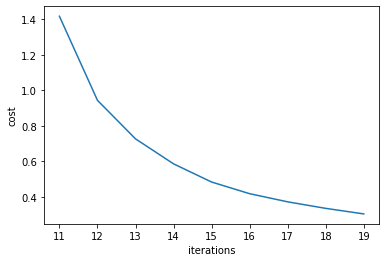

In [23]:
res01 = model(x_train, y_train, x_test, y_test, 0, 1)

plt.plot(np.squeeze(res01['costs']))
plt.ylabel('cost')
plt.xlabel('iterations')
plt.show()

0th iteration cost: 14.882338939029387
100th iteration cost: 3.3179297651565185
200th iteration cost: 2.4781356300205224
300th iteration cost: 2.0334464716888707
400th iteration cost: 1.7392625730925142
500th iteration cost: 1.5017517482777132
600th iteration cost: 1.3026292121004488
700th iteration cost: 1.1348874598063803
800th iteration cost: 0.9936552707983992
900th iteration cost: 0.8749200859476476
1000th iteration cost: 0.7745754552954048
1100th iteration cost: 0.6877215514029242
1200th iteration cost: 0.6110138386410465
1300th iteration cost: 0.5427129784037135
1400th iteration cost: 0.48211103910976766
1500th iteration cost: 0.4291536358304072
1600th iteration cost: 0.3835785016618891
1700th iteration cost: 0.3443734822958883
1800th iteration cost: 0.31049998956113634
1900th iteration cost: 0.2812871855302819
train acc: 91.38755980861244 test acc: 60.0


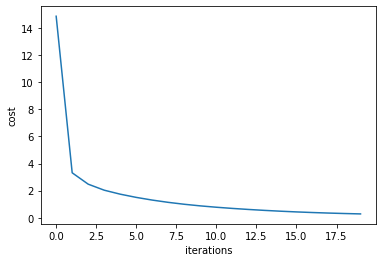

In [24]:
res_11 = model(x_train, y_train, x_test, y_test, -1, 1)

plt.plot(np.squeeze(res_11['costs']))
plt.ylabel('cost')
plt.xlabel('iterations')
plt.show()

#### نتایج نهایی
##### با مقداردهی رندوم در بازه‌ی منفی یک تا ۱: دقت آموزش ۹۱.۳ و آزمون ۶۰ درصد
##### با مقداردهی رندوم در بازه‌ی صفر تا یک: دقت آموزش ۹۰.۴ و آزمون ۶۴ درصد

#### واضحا مقداردهی اولیه صفر، نتیجه‌ی بهتری برای داده‌های آزمون داشته است